<a href="https://colab.research.google.com/github/joaoclaudio82/CNNclassification-/blob/main/Indicador_de_Infla%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instale essa biblioteca
!pip install flexitext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Libs necessarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from flexitext import flexitext

# Recolhendo os dados
Pais = ['BRA', 'ARG', 'URU', 'CHI', 'USA', 'ENG', 
        'POR', 'ESP', 'GER', 'FRA', 'IND', 'ITA', 'CAN', 
        'CHN', 'JPN', 'AUS', ' COL']

Inflacao = [12.13, 58, 9.37, 10.5, 8.3, 9, 8.0, 8.7, 7.9, 5.2, 7.7, 
            6.9, 6.8, 2.1, 2.5, 5.1, 9.2 ]

Dicionario = {
    'Pais' : Pais,
    'Inflacao' : Inflacao
}

# Gerando o DF
Dados = pd.DataFrame( Dicionario )

# Ordenando pela maior inflação
Dados.sort_values('Inflacao', inplace=True, ascending=True )

# Resetando o index
Dados.reset_index( inplace=True, drop=True )

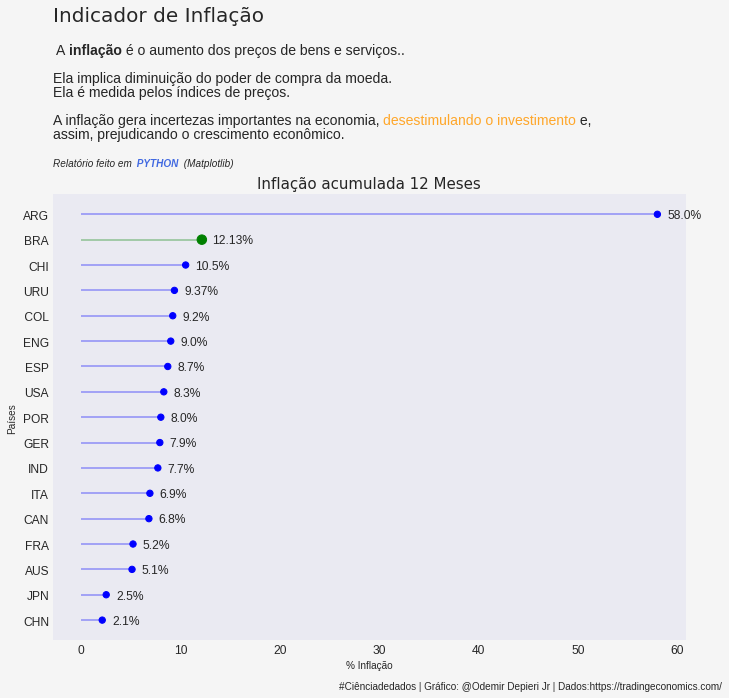

In [ ]:
# Ajuste na opção
Opcao_Cor = np.where( Dados['Pais']=='BRA', 'green', 'blue')
Opcao_Tamanho = np.where( Dados['Pais']=='BRA', 90, 40 )

# Estilo do gráfico
plt.style.use('seaborn-dark')

# Tamanho da figura
Figura, Eixo = plt.subplots( figsize=(10, 10) )

# Set background color
Figura.set_facecolor('#f5f5f5')

# Plot
Eixo.hlines( y=Dados.Pais, xmin=0, xmax=Dados['Inflacao'], color=Opcao_Cor, alpha=0.4 )
Eixo.scatter( Dados['Inflacao'], Dados.index, color=Opcao_Cor, s=Opcao_Tamanho, alpha=1 )

# Incluindo o Texto
for Registro in range (0, Dados.shape[0] ):
  Eixo.text(
      Dados['Inflacao'][Registro] + 1,
      Dados.index[Registro] - 0.15,
      str( Dados['Inflacao'][Registro] ) + '%',
      fontsize=12,
  )

# Labels
plt.title('Inflação acumulada 12 Meses', loc='center', fontsize=15, fontfamily='DejaVu Sans')
plt.xlabel('% Inflação')
plt.ylabel('Países')
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

# Adjust figure padding. 
Figura.subplots_adjust(top=0.7, bottom=0.08, left=0.06, right=0.94)

# Add title
Figura.text(
    0.06, 0.94, 'Indicador de Inflação', 
   fontsize=20, fontname='DejaVu Sans', va='baseline'
)

# Adicionado descritivo
Subtitulo = '''<size:14> <weight:normal>A <weight:bold>inflação</> é o aumento dos preços de bens e serviços.. </>
<size:14>
Ela implica diminuição do poder de compra da moeda.
Ela é medida pelos índices de preços.

A inflação gera incertezas importantes na economia, <color:#ffa72b>desestimulando o investimento</> e, 
assim, prejudicando o crescimento econômico. </>

<size:10><weight:500, style:italic>Relatório feito em <color:royalblue, weight:bold> PYTHON </> (Matplotlib) </></>
 </>
'''

# Incluindo o descritivo
flexitext(0.06, 0.91, Subtitulo, va='top', xycoords='figure fraction', ax=Eixo)

# Adicionando Rodape
Rodape = '#Ciênciadedados | Gráfico: @Odemir Depieri Jr | Dados:https://tradingeconomics.com/'
Figura.text(0.99, 0.01, Rodape, ha='right', va='bottom', size=10);